In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
plt.style.use('ggplot')

In [5]:
columns = ['user_id','order_dt','order_products','order_amount'] #生成列名
df = pd.read_csv('CDNOW_master.txt',names= columns,sep='\s+') #载入数据

In [6]:
df.head()

,user_id,order_dt,order_products,order_amount
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


#### 可以观察到id为2 的用户在1月12日进行了2次下单

In [7]:
df.describe()

,user_id,order_dt,order_products,order_amount
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


#### 用户平均购买数是2.4个商品，价格为36，标准差为2.3，50%的中位数落在2，而75% 在3之内，表明大部分的订单都是较小的订单，最大值为99，可以看出每个商品价格大致为10元左右，知道每个订单价格都不是很大。

In [8]:
df.info() #可以看到没用空值 是很干净的数据

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
user_id           69659 non-null int64
order_dt          69659 non-null int64
order_products    69659 non-null int64
order_amount      69659 non-null float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


#### df.info()：查看索引、数据类型和内存信息


In [10]:
df.isnull()

,user_id,order_dt,order_products,order_amount
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


### 时间数据的转换

In [11]:
df['order_date'] = pd.to_datetime(df['order_dt'],format='%Y%m%d') #转换格式
df['mouth'] = df['order_date'].values.astype('datetime64[M]') #以月作为消费频率
df.head(10)
df['order_date'] = pd.to_datetime(df['order_dt'],format='%Y%m%d')
df['mouth'] = df['order_date'].values.astype

,user_id,order_dt,order_products,order_amount,order_date,mouth
0,1,19970101,1,11.77,1997-01-01,1997-01-01
1,2,19970112,1,12.00,1997-01-12,1997-01-01
2,2,19970112,5,77.00,1997-01-12,1997-01-01
3,3,19970102,2,20.76,1997-01-02,1997-01-01
4,3,19970330,2,20.76,1997-03-30,1997-03-01
5,3,19970402,2,19.54,1997-04-02,1997-04-01
6,3,19971115,5,57.45,1997-11-15,1997-11-01
7,3,19971125,4,20.96,1997-11-25,1997-11-01
8,3,19980528,1,16.99,1998-05-28,1998-05-01
9,4,19970101,2,29.33,1997-01-01,1997-01-01


#### 把order_dt 转化为标准的日期格式，形成order_date列，mouth为每份订单所属的月份，为接下来的分析做准备

### 2.2.从用户角度分析消费情况


In [12]:
user_consume = df.groupby('user_id').sum()[['order_products','order_amount']] #单个用户消费情况
user_consume.head(20)

,order_products,order_amount
user_id,,
1,1,11.77
2,6,89.00
3,16,156.46
4,7,100.50
5,29,385.61
6,1,20.99
7,18,264.67
8,18,197.66
9,6,95.85


In [13]:
user_consume.describe()

,order_products,order_amount
count,23570.000000,23570.000000
mean,7.122656,106.080426
std,16.983531,240.925195
min,1.000000,0.000000
25%,1.000000,19.970000
50%,3.000000,43.395000
75%,7.000000,106.475000
max,1033.000000,13990.930000


#### 从用户消费情况，我们可以看出，一个用户平均购买7个商品，总共106元，合一件商品单价为10-20元之内，客单价为100元，最多的用户购买了1033件商品，花费了1万元，属于极度狂热用户，我们发现75%的用户还不到整个平均值，所以会有很多狂热用户，拉高了平均值

### 2.3 用户月消费情况

In [16]:
mouth_consums = df.groupby('mouth').sum()[['order_products','order_amount']]
mouth_consums.head(20)

,order_products,order_amount
mouth,,
1997-01-01,19416,299060.17
1997-02-01,24921,379590.03
1997-03-01,26159,393155.27
1997-04-01,9729,142824.49
1997-05-01,7275,107933.30
1997-06-01,7301,108395.87
1997-07-01,8131,122078.88
1997-08-01,5851,88367.69
1997-09-01,5729,81948.80


In [17]:
mouth_consums.describe()

,order_products,order_amount
count,18.000000,18.000000
mean,9326.722222,138906.423889
std,6760.373744,103884.935965
min,4697.000000,66231.520000
25%,5437.250000,78309.920000
50%,6846.500000,101755.325000
75%,8051.250000,120421.320000
max,26159.000000,393155.270000


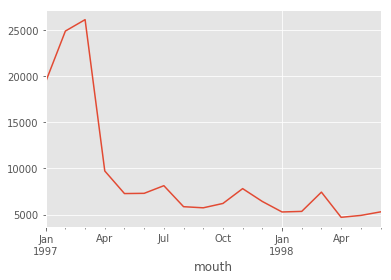

In [20]:
mouth_consums.order_products.plot()  #月度订单情况

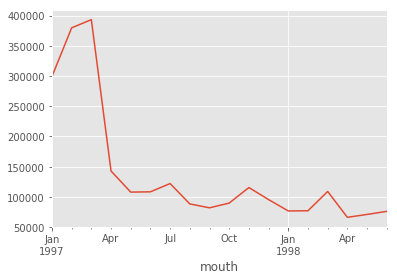

In [21]:
mouth_consums.order_amount.plot()  #月度销售额情况

#### 按照统计的数据，可以发现在刚刚开始的几个月不论是订单数，还是销售情况增长都较为明显，随着时间的推移，订单数和销售情况发生快速下跌，并在底部的数据较为而稳定

### 2.4 订单和销售情况


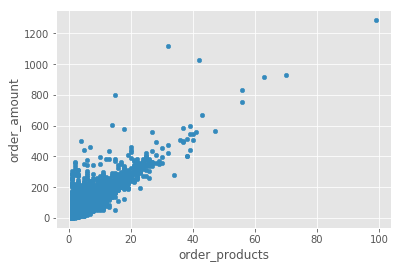

In [22]:
df.plot.scatter(x='order_products',y='order_amount') # 每单‘销售额和订单数点图’

#### 绘制每笔订单是散点图，从图中观察，订单消费金额和订单商品呈规律性，每个商品大概都是10元，订单极值情况较少

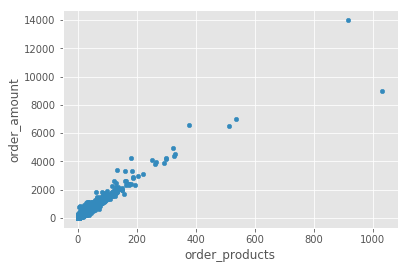

In [25]:
user_consume.plot.scatter(x='order_products',y='order_amount') #每个用户订单消费情况

#### 绘制用户散点图，发现规律较为明显，大部分数据都，因为CD网站的消费数据较为单一，金额和商品也呈现出线性关系，没多少离群点，有消费能力强的用户，但是比较少  为了更好观察，我们用直方图观察

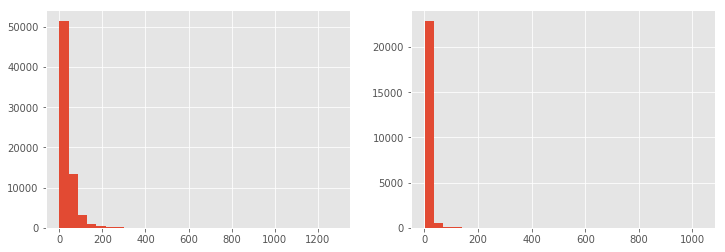

In [26]:
fig = plt.figure(figsize =(12,4))
fig.add_subplot(1,2,1)
df.order_amount.hist(bins=30)
fig.add_subplot(1,2,2)
user_consume.order_products.hist(bins=30)

#### 从直方图中可以发现，大部分的用户的消费能力确实不高，高消费用户在图中基本看不到，这也符合消费规律

### 2.5消费时间和节点



In [28]:
df.groupby('user_id').mouth.min().value_counts()

1997-02-01    8476
1997-01-01    7846
1997-03-01    7248
Name: mouth, dtype: int64

#### 用GROUPby函数将用户分组，并且求月份的最小值，最小值即用户消费行为中第一次消费时间。结果出来了，所有用户的第一次消费都集中在前三个月。我们可以这样认为，该订单数据只是选择了某个时间段消费用户在18个月内的消费行为

In [32]:
df.groupby('user_id').mouth.max().value_counts()

1997-02-01    4912
1997-03-01    4478
1997-01-01    4192
1998-06-01    1506
1998-05-01    1042
1998-03-01     993
1998-04-01     769
1997-04-01     677
1997-12-01     620
1997-11-01     609
1998-02-01     550
1998-01-01     514
1997-06-01     499
1997-07-01     493
1997-05-01     480
1997-10-01     455
1997-09-01     397
1997-08-01     384
Name: mouth, dtype: int64

#### 观察用户最后一次消费时间，绝大分数数据扔集中在前三个月，后续时间段虽然还有用户在购买，但是在缓慢减少。异常趋势的原因获得了解释，现在针对消费数据进一步做细化，

#### 我们要明确，这只是部分消费用户的订单数据，所以具有一定局限性，在这里我们统一将数据，在这里，我们统一将数据上消费的用户定义为新客。

### 3.复购率和回购率分析



In [44]:
pivoted_counts = df.pivot_table(index ='user_id',columns = 'mouth',values = 'order_dt',aggfunc = 'count').fillna(0)
colums_mouth = df.mouth.sort_values().astype('str').unique()
pivoted_counts.columns = colums_mouth
pivoted_counts.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


### 复购率分析


In [53]:
pivoted_counts_reorder=pivoted_counts.applymap(lambda x:1 if x>1 else np.NaN if x==0 else 0)
pivoted_counts_reorder.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 <a list of 18 Text xticklabel objects>)

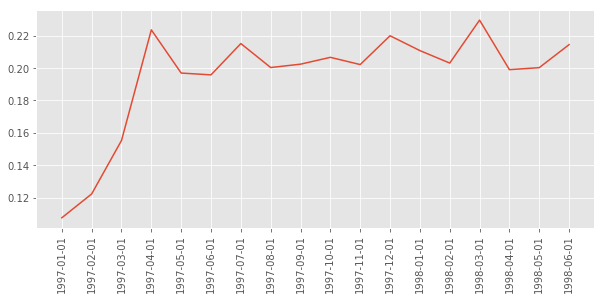

In [54]:
mouth_counts_recoder_rate=pd.DataFrame(pivoted_counts_reorder.sum()/pivoted_counts_reorder.count())
plt.figure(figsize=(10,4))
plt.plot(mouth_counts_recoder_rate)
plt.xticks(rotation=90)

#### 图上可以看到复购率出现在早期，因为大量新用户加入的关系，新客复购率并不高，譬如1月新客的复购率只有6%，而在后期都是老客户，复购率比较稳定，20%左右，单看新客与老客之间复购率之间相差3倍

#### 复购率分析

In [57]:
def func_repurchase(date):
    status =[]
    for i in range(date.count()-1):
        if date[i]>0:
            if date[i+1] > 0:
                status.append(1)
                
            else:
                status.append(0)
        else:
            status.append(np.NaN)
    status.append(np.NaN)
    return pd.Series(status,index=date.index)
repurchase=pivoted_counts.apply(func_repurchase,axis=1)
repurchase.head(10)

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,1.0,1.0,1.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN
6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8,1.0,0.0,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN
9,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### if的主要逻辑是，如果用户本月进行过消费，且下月进行过消费过，记为1，没有消费过记为0，本月若没有进行过消费，为NAN，后续中统计进行排除。

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 <a list of 18 Text xticklabel objects>)

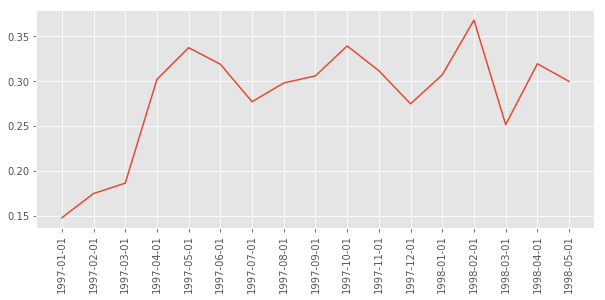

In [58]:
repurchase_rate=pd.DataFrame(repurchase.sum()/repurchase.count())#计算复购率
plt.figure(figsize=(10,4))
plt.plot(repurchase_rate)
plt.xticks(rotation=90)

#### 从图中可以看出，用户的回购率要高于复购率，约在30%左右，新客户的回购率在15%左右和老用户的差异不大。将回购率和复购率综合分析，可以得出新客的整体质量低于老客，老客的忠诚度

### 4 用户层分析

In [61]:
def active_status(data):
    status = []
    if data[0] == 0:
        status.append('unreg')
    else:
        status.append('new')
    for i in range(data.count()-1):
        if data[i+1] == 0:
            if status[i]=='unreg':
                status.append('unreg')
            else:
                status.append('unactive')
        else:
            if status[i] == 'unreg':
                status.append('new')
            elif data[i] > 0:
                status.append('active')
            else:
                status.append('return')
                
    return pd.Series(status,index=data.index)
pivoted_purchase_status = pivoted_counts.apply(active_status,axis = 1)
pivoted_purchase_status.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
2,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
3,new,unactive,return,active,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,return,unactive
4,new,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,unactive
5,new,active,unactive,return,active,active,active,unactive,return,unactive,unactive,return,active,unactive,unactive,unactive,unactive,unactive


In [62]:
pivoted_counts

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


#### 我们按用户的消费行为进行统计，讲用户简单划分为几个维度，新用户，活跃用户，不活跃用户，回流用户，第一次消费就是新用户，活跃用户就是在当前时间窗口和上一个时间窗口进行过消费，用户有过一次以上的消费就可以叫做老客，不活跃用户就是在时间窗口内没有进行消费的用户，回流就是在上一个时间窗口没有进行消费而在本时间窗口期内进行了消费

In [63]:
purchase_status_counts = pivoted_purchase_status.replace('unreg',np.NaN).apply(lambda x:pd.value_counts(x)) #统计不同分层的用户个数
purchase_status_counts

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
active,NaN,1157.0,1681,1773.0,852.0,747.0,746.0,604.0,528.0,532.0,624.0,632.0,512.0,472.0,571.0,518.0,459.0,446.0
new,7846.0,8476.0,7248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
return,NaN,NaN,595,1049.0,1362.0,1592.0,1434.0,1168.0,1211.0,1307.0,1404.0,1232.0,1025.0,1079.0,1489.0,919.0,1029.0,1060.0
unactive,NaN,6689.0,14046,20748.0,21356.0,21231.0,21390.0,21798.0,21831.0,21731.0,21542.0,21706.0,22033.0,22019.0,21510.0,22133.0,22082.0,22064.0


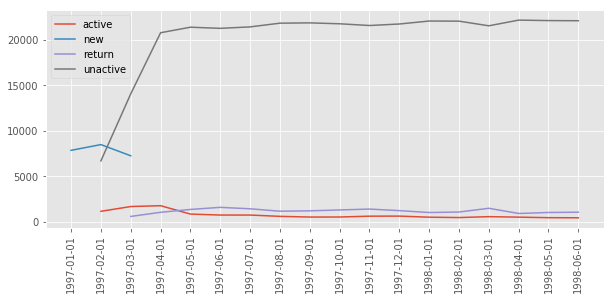

In [64]:
plt.figure(figsize=(10,4))
plt.plot(purchase_status_counts.T)
plt.xticks(rotation=90)
plt.legend(purchase_status_counts.index)

#### 由上图知回流和活跃用户比较稳定

In [65]:
return_rate=purchase_status_counts.apply(lambda x:x/x.sum(),axis=1) #统计不同分层用户的比率
return_rate.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
active,NaN,0.090011,0.130776,0.137934,0.066283,0.058114,0.058036,0.046989,0.041077,0.041388,0.048545,0.049168,0.039832,0.036720,0.044422,0.040299,0.035709,0.034697
new,0.332881,0.359610,0.307510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
return,NaN,NaN,0.031390,0.055342,0.071854,0.083988,0.075653,0.061620,0.063888,0.068953,0.074070,0.064996,0.054075,0.056924,0.078554,0.048483,0.054286,0.055922
unactive,NaN,0.019337,0.040606,0.059981,0.061739,0.061377,0.061837,0.063017,0.063112,0.062823,0.062276,0.062751,0.063696,0.063655,0.062184,0.063985,0.063838,0.063786


### 4.1.回流用户和活跃用户分析


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 <a list of 18 Text xticklabel objects>)

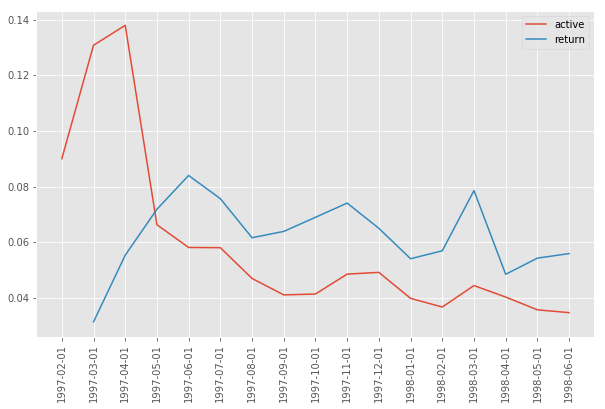

In [67]:
plt.figure(figsize=(10,6))
plt.plot(return_rate.loc[['active','return'],].T)
plt.legend(['active','return'])
plt.xticks(rotation=90)

#### 用户的回流占比在5%-8%，有下降趋势。所谓回流占比，就是回流用户在总用户中的占比。另外一种指标叫做回流率，指上个月多少不活跃/消费用户在本月活跃/消费。因此不活跃用户总量近似不变，所以这里的回流率也近似回流占比。活跃用户的下降趋势更为明显，占比3%-5%之间，这里用户活跃可以看做连续消费用户，质量在一定程度上高于回流用户。

### 4.2.用户质量分析


In [68]:
user_amount = df.groupby('user_id').order_amount.sum().sort_values().reset_index()
user_amount_sum = user_amount['order_amount'].sum()
user_amount['amount_cumsum'],user_amount['prop'] = user_amount.order_amount.cumsum(),(user_amount.order_amount/user_amount_sum).cumsum()
user_amount.tail()

,user_id,order_amount,amount_cumsum,prop
23565,7931,6497.18,2463822.60,0.985405
23566,19339,6552.70,2470375.30,0.988025
23567,7983,6973.07,2477348.37,0.990814
23568,14048,8976.33,2486324.70,0.994404
23569,7592,13990.93,2500315.63,1.000000


#### 新建一个对象，按用户的消费金额生序。使用cumsum，它是累加函数。逐行计算累计的金额，最后的2500315便是总消费额。



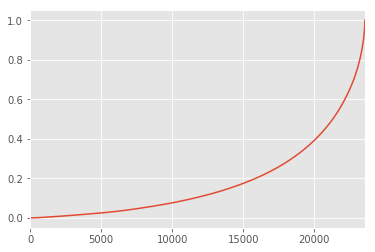

In [69]:
user_amount.prop.plot()

#### 绘制趋势图，横坐标是按贡献金额大小排序而成，纵坐标则是用户累计贡献。可以很清楚的看到，前20000个用户贡献了40%的消费。后面4000位用户贡献了60%，确实呈现28倾向。



#### 统计一下销量，前两万个用户贡献了40%的销量，高消费用户贡献了60%的销量。在消费领域中，狠抓高质量用户是万古不变的道理。

### 4.3  用户生命周期分析

In [70]:
order_date_min,order_date_max=df.groupby('user_id').order_date.min(),df.groupby('user_id').order_date.max()
(order_date_max-order_date_min).head(10)

user_id
1      0 days
2      0 days
3    511 days
4    345 days
5    367 days
6      0 days
7    445 days
8    452 days
9    523 days
10     0 days
Name: order_date, dtype: timedelta64[ns]

In [71]:
(order_date_max-order_date_min).describe()


count                       23570
mean     134 days 20:55:36.987696
std      180 days 13:46:43.039788
min               0 days 00:00:00
25%               0 days 00:00:00
50%               0 days 00:00:00
75%             294 days 00:00:00
max             544 days 00:00:00
Name: order_date, dtype: object

#### 用户生命周期，即第一次消费至最后一次消费的时间差，因为用户都是前三个月第一次消费。随着用户的持续消费，用户的生命周期会变长，用户的平均生命周期为134天，算是比较高的；

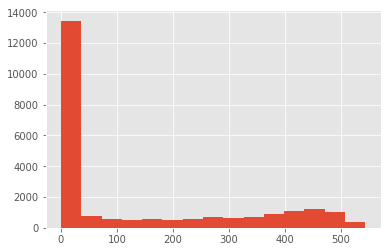

In [72]:
((order_date_max-order_date_min)/np.timedelta64(1,'D')).hist(bins=15)

#### 大部分用户都只是消费了一次，因此所有的生命周期的大头都集中在了0天。但这不是我们想要的答案，我们来计算一下消费两次以上的老客户的生命周期

In [74]:
life_time = (order_date_max-order_date_min).reset_index()
life_time.head()

,user_id,order_date
0,1,0 days
1,2,0 days
2,3,511 days
3,4,345 days
4,5,367 days


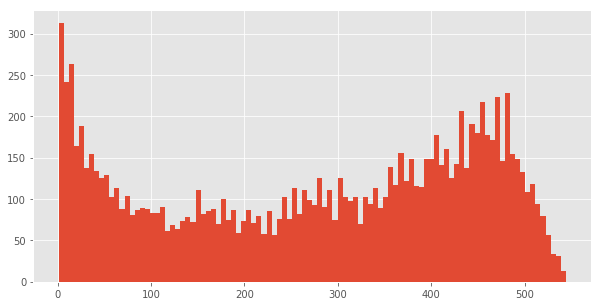

In [75]:
life_time['life_time']=life_time.order_date/np.timedelta64(1,'D')
life_time[life_time.life_time>0].life_time.hist(bins=100,figsize=(10,5))#排除仅消费一次的用户


In [80]:
life_time[life_time.life_time>0].life_time.describe()

count    11516.000000
mean       276.044807
std        166.633990
min          1.000000
25%        117.000000
50%        302.000000
75%        429.000000
max        544.000000
Name: life_time, dtype: float64

#### 消费两次以上的用户生命周期是276天，远高于总体。从策略看，用户首次消费后应该花费更多的引导其进行多次消费，提供生命周期，这会带来2.5倍的增量。



### 4.4.留存率分析


In [81]:
user_purchase_retention=pd.merge(left=df,right=order_date_min.reset_index(),on='user_id',suffixes=('','_min'))
user_purchase_retention['order_date_diff']=user_purchase_retention.order_date-user_purchase_retention.order_date_min
user_purchase_retention['date_diff']=user_purchase_retention['order_date_diff']/np.timedelta64(1,'D')
bin=[0,3,7,15,30,60,90,180,365]
user_purchase_retention['date_diff_bin']=pd.cut(user_purchase_retention.date_diff,bins=bin)
user_purchase_retention.head(10)

,user_id,order_dt,order_products,order_amount,order_date,mouth,order_date_min,order_date_diff,date_diff,date_diff_bin
0,1,19970101,1,11.77,1997-01-01,1997-01-01,1997-01-01,0 days,0.0,NaN
1,2,19970112,1,12.00,1997-01-12,1997-01-01,1997-01-12,0 days,0.0,NaN
2,2,19970112,5,77.00,1997-01-12,1997-01-01,1997-01-12,0 days,0.0,NaN
3,3,19970102,2,20.76,1997-01-02,1997-01-01,1997-01-02,0 days,0.0,NaN
4,3,19970330,2,20.76,1997-03-30,1997-03-01,1997-01-02,87 days,87.0,"(60.0, 90.0]"
5,3,19970402,2,19.54,1997-04-02,1997-04-01,1997-01-02,90 days,90.0,"(60.0, 90.0]"
6,3,19971115,5,57.45,1997-11-15,1997-11-01,1997-01-02,317 days,317.0,"(180.0, 365.0]"
7,3,19971125,4,20.96,1997-11-25,1997-11-01,1997-01-02,327 days,327.0,"(180.0, 365.0]"
8,3,19980528,1,16.99,1998-05-28,1998-05-01,1997-01-02,511 days,511.0,NaN
9,4,19970101,2,29.33,1997-01-01,1997-01-01,1997-01-01,0 days,0.0,NaN


#### 如果用户仅消费了一次，留存率应该是0。另外一方面，如果用户第一天内消费了多次，但是往后没有消费，也算作留存率0。



In [82]:
pivoted_retention=user_purchase_retention.pivot_table(index='user_id',columns='date_diff_bin',values='order_amount',aggfunc=sum,dropna=False)
pivoted_retention.head(10)

date_diff_bin  (0, 3]  (3, 7]  (7, 15]  (15, 30]  (30, 60]  (60, 90]  \
user_id                                                                
1                 NaN     NaN      NaN       NaN       NaN       NaN   
2                 NaN     NaN      NaN       NaN       NaN       NaN   
3                 NaN     NaN      NaN       NaN       NaN      40.3   
4                 NaN     NaN      NaN     29.73       NaN       NaN   
5                 NaN     NaN    13.97       NaN     38.90       NaN   
6                 NaN     NaN      NaN       NaN       NaN       NaN   
7                 NaN     NaN      NaN       NaN       NaN       NaN   
8                 NaN     NaN      NaN       NaN     13.97       NaN   
9                 NaN     NaN      NaN       NaN       NaN       NaN   
10                NaN     NaN      NaN       NaN       NaN       NaN   

date_diff_bin  (90, 180]  (180, 365]  
user_id                               
1                    NaN         NaN  
2                 

#### pivot_table数据透视，获得的结果是用户在第一次消费之后，在后续各时间段内的消费总额。



In [83]:
pivoted_retention.mean()

date_diff_bin
(0, 3]        35.905798
(3, 7]        36.385121
(7, 15]       42.669895
(15, 30]      45.964649
(30, 60]      50.215070
(60, 90]      48.975277
(90, 180]     67.223297
(180, 365]    91.960059
dtype: float64

#### 计算一下用户在后续各时间段的平均消费额，这里只统计有消费的平均值。虽然后面时间段的金额高，但是它的时间范围也宽广。从平均效果看，用户第一次消费后的0～3天内，更可能消费更多。



In [84]:
pivoted_retention_trans=pivoted_retention.fillna(0).applymap(lambda x:1 if x>0 else 0)
pivoted_retention_trans.head()


date_diff_bin  (0, 3]  (3, 7]  (7, 15]  (15, 30]  (30, 60]  (60, 90]  \
user_id                                                                
1                   0       0        0         0         0         0   
2                   0       0        0         0         0         0   
3                   0       0        0         0         0         1   
4                   0       0        0         1         0         0   
5                   0       0        1         0         1         0   

date_diff_bin  (90, 180]  (180, 365]  
user_id                               
1                      0           0  
2                      0           0  
3                      0           1  
4                      0           1  
5                      1           1  

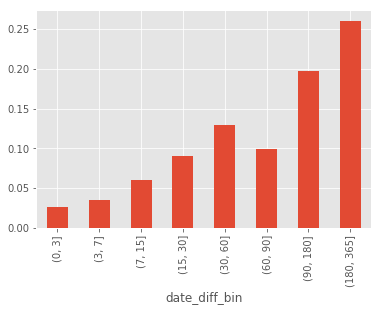

In [85]:
(pivoted_retention_trans.sum()/pivoted_retention_trans.count()).plot.bar()

#### 只有2.5%的用户在第一次消费的次日至3天内有过消费，3%的用户在3～7天内有过消费。数字并不好看，CD购买确实不是高频消费行为。时间范围放宽后数字好看了不少，有20%的用户在第一次消费后的三个月到半年之间有过购买，27%的用户在半年后至1年内有过购买。从运营角度看，CD机营销在教育新用户的同时，应该注重用户忠诚度的培养，放长线掉大鱼，在一定时间内召回用户购买。
